In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import pickle

In [2]:
brent = pd.read_excel(r'C:\Users\Sandhyana\Desktop\brentprice.xls', sheet_name='Data 1',index_col='Date')
wti = pd.read_excel(r'C:\Users\Sandhyana\Desktop\wtiprice.xls', sheet_name='Data 1',index_col='Date')

In [3]:
brent1 = brent.resample('D').ffill().reset_index()
wti1 = wti.resample('D').ffill().reset_index()

In [4]:
prices=[brent1['Date'],brent1['bp'],wti1['wp']]
price=pd.concat(prices, axis=1)
price

,Date,bp,wp
0,1987-05-20,18.63,19.75
1,1987-05-21,18.45,19.95
2,1987-05-22,18.55,19.68
3,1987-05-23,18.55,19.68
4,1987-05-24,18.55,19.68
...,...,...,...
12118,2020-07-23,42.96,40.99
12119,2020-07-24,43.29,41.23
12120,2020-07-25,43.29,41.23
12121,2020-07-26,43.29,41.23


In [5]:
price = price[(price['Date' ] > '1999-12-31') & (price['Date' ] <= '2010-12-31')]
price

,Date,bp,wp
4609,2000-01-01,24.93,25.76
4610,2000-01-02,24.93,25.76
4611,2000-01-03,24.93,25.76
4612,2000-01-04,23.95,25.56
4613,2000-01-05,23.72,24.65
...,...,...,...
8622,2010-12-27,93.08,90.99
8623,2010-12-28,93.52,91.48
8624,2010-12-29,93.52,91.13
8625,2010-12-30,92.50,89.85


In [6]:
price.set_index('Date', inplace=True)


In [7]:
price['brentdiff']=100*(np.log((price['bp'])/price['bp'].shift(1)))
price['wtidiff']=100*(np.log((price['wp'])/price['wp'].shift(1)))
price

C:\Users\Sandhyana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sandhyana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bp,wp,brentdiff,wtidiff
Date,,,,
2000-01-01,24.93,25.76,NaN,NaN
2000-01-02,24.93,25.76,0.000000,0.000000
2000-01-03,24.93,25.76,0.000000,0.000000
2000-01-04,23.95,25.56,-4.010357,-0.779427
2000-01-05,23.72,24.65,-0.964975,-3.625173
...,...,...,...,...
2010-12-27,93.08,90.99,-0.589151,0.164989
2010-12-28,93.52,91.48,0.471598,0.537076
2010-12-29,93.52,91.13,0.000000,-0.383331


In [8]:
price1=price.dropna()
price1

,bp,wp,brentdiff,wtidiff
Date,,,,
2000-01-02,24.93,25.76,0.000000,0.000000
2000-01-03,24.93,25.76,0.000000,0.000000
2000-01-04,23.95,25.56,-4.010357,-0.779427
2000-01-05,23.72,24.65,-0.964975,-3.625173
2000-01-06,23.55,24.79,-0.719275,0.566345
...,...,...,...,...
2010-12-27,93.08,90.99,-0.589151,0.164989
2010-12-28,93.52,91.48,0.471598,0.537076
2010-12-29,93.52,91.13,0.000000,-0.383331


In [9]:
price2= price1.iloc[:, 2:]
price2

,brentdiff,wtidiff
Date,,
2000-01-02,0.000000,0.000000
2000-01-03,0.000000,0.000000
2000-01-04,-4.010357,-0.779427
2000-01-05,-0.964975,-3.625173
2000-01-06,-0.719275,0.566345
...,...,...
2010-12-27,-0.589151,0.164989
2010-12-28,0.471598,0.537076
2010-12-29,0.000000,-0.383331


In [10]:
#Constructing the VAR model
import statsmodels.tsa.api as smt
model=smt.VAR(price2)
res=model.fit(maxlags=2)
res.summary()

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Aug, 2020
Time:                     16:33:55
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.52510
Nobs:                     4015.00    HQIC:                   2.51498
Log likelihood:          -16421.7    FPE:                    12.2978
AIC:                      2.50942    Det(Omega_mle):         12.2672
--------------------------------------------------------------------
Results for equation brentdiff
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.028968         0.031153            0.930           0.352
L1.brentdiff        -0.210034         0.019439          -10.805           0.000
L1.wtidiff           0.320682         0.017537           18.

In [11]:
#first step in construction of any VAR model, is to determine
#the appropriate lag length
#we employ a multivariate information criteria 
res= model.select_order(maxlags=10)
res.summary()

,AIC,BIC,FPE,HQIC
0,2.645,2.648,14.08,2.646
1,2.516,2.525,12.38,2.519
2,2.509,2.525*,12.30,2.515
3,2.503,2.525,12.22,2.511*
4,2.501,2.530,12.20,2.511
5,2.501,2.536,12.20,2.513
6,2.500,2.541,12.19,2.515
7,2.496,2.543,12.13,2.512
8,2.496,2.550,12.14,2.515
9,2.494,2.553,12.11,2.515


In [12]:
#Generally, we choose the lag length for which the values of most of these 
#lag length criteria are minimized
#based on the BIC method, we determine the minimum lag order to be 2
# we next run a Granger causality test
model = smt.VAR(price2)
res = model.fit(maxlags=2)
res_causality=res.test_causality(causing=['brentdiff'],caused=['wtidiff'], kind='wald',signif=0.05)
res_causality.summary()

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Test statistic,Critical value,p-value,df
0.6941,5.991,0.707,2


In [14]:
model1 = smt.VAR(price2)
res1 = model1.fit(maxlags=2)
res_causality1=res1.test_causality(causing=['wtidiff'],caused=['brentdiff'], kind='wald',signif=0.05)
res_causality1.summary()

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Test statistic,Critical value,p-value,df
334.7,5.991,0.000,2


In [15]:
#we find that only WTI granger causes brent in the period 2000-2010, while we fail to reject 

Impulse response analysis is an important step in econometric analyes, which employ vector autoregressive models. Their main purpose is to describe the evolution of a model’s variables in reaction to a shock in one or more variables. This feature allows to trace the transmission of a single shock within an otherwise noisy system of equations and, thus, makes them very useful tools in the assessment of economic policies

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


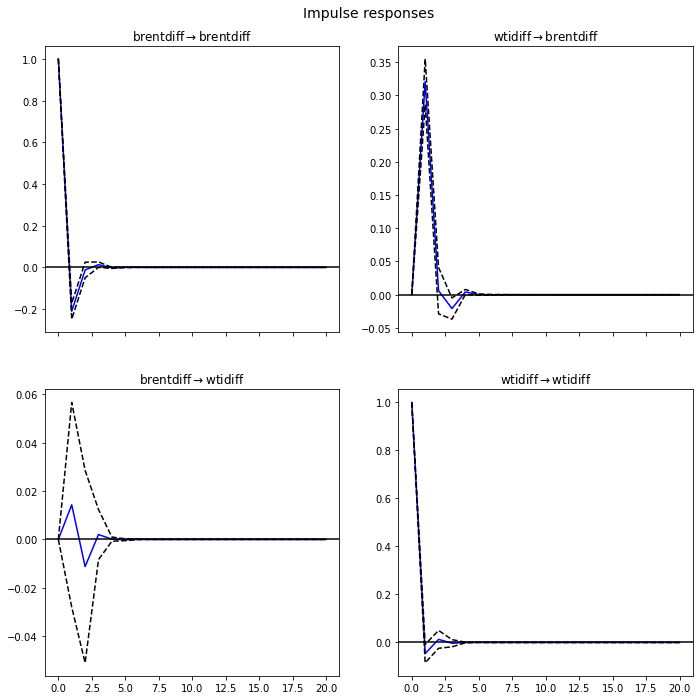

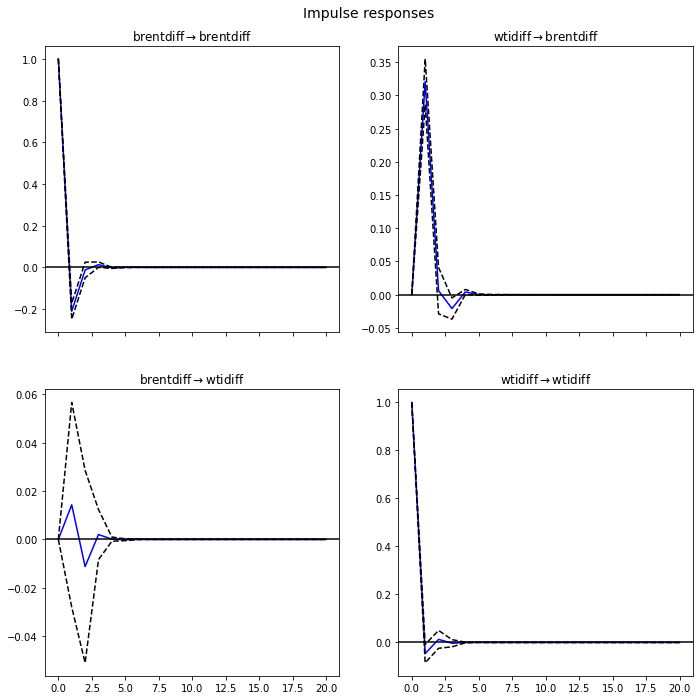

In [16]:
#to find the impact of changes in one variable on the other at different
#horizons, we obtain the impulse responses for the estimated model
#we re-define the dependent variables and select a VAR model with one lag
#of each variable and an arbitrary period number of 20 is used

model=smt.VAR(price2)
res=model.fit(maxlags=2)

#impulse response analysis
irf=res1.irf(20)
irf.plot()

In [17]:
#we find that WTI Granger causes brent and vice versa
# this implies that changes in WTI cause changes in brent and 
#similarly, lags of WTI should be significant in the equation for brent 
#same applies for brent-WTI
#hence a bi-directional causality is detected

The variance decompositions (also known as forecast error variance decompositions, or fevd in Python) can also be generated using the fevd function (forecast-error variance decompositions)

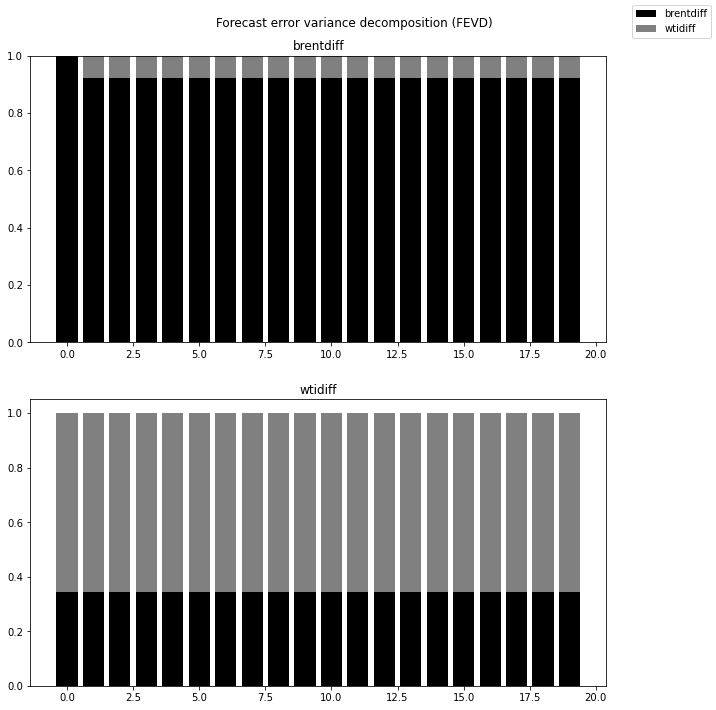

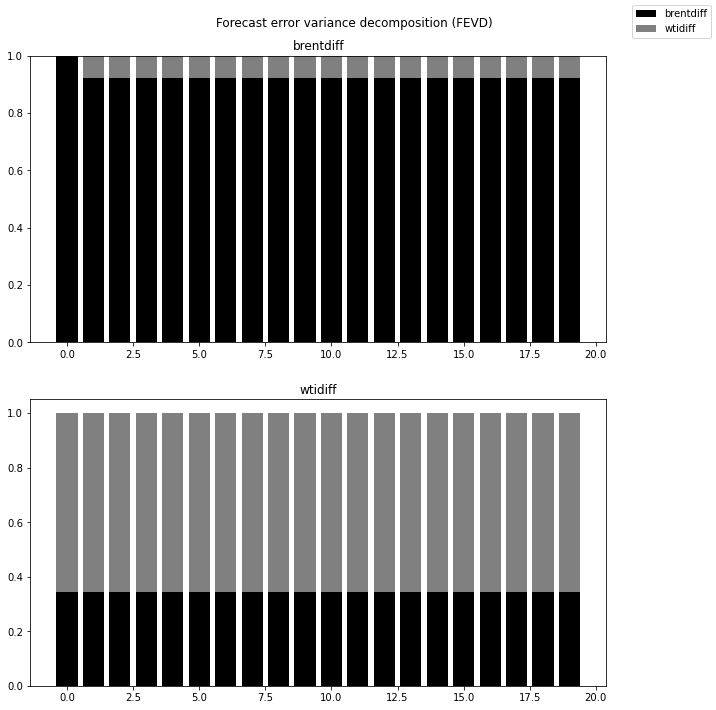

In [18]:
fevd=res.fevd(20)
fevd.plot()

In [19]:
#the graph above shows that in the case of brent, the percentage of 
#the errors that is attributable to its own shocks is 100%, while
#for WTI, the brent series explains around 40% of the variation 

In [20]:
#we reverse the columns to check for the effect of WTI on brent 
price3=price2[['wtidiff','brentdiff']]
price3

,wtidiff,brentdiff
Date,,
2000-01-02,0.000000,0.000000
2000-01-03,0.000000,0.000000
2000-01-04,-0.779427,-4.010357
2000-01-05,-3.625173,-0.964975
2000-01-06,0.566345,-0.719275
...,...,...
2010-12-27,0.164989,-0.589151
2010-12-28,0.537076,0.471598
2010-12-29,-0.383331,0.000000


C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


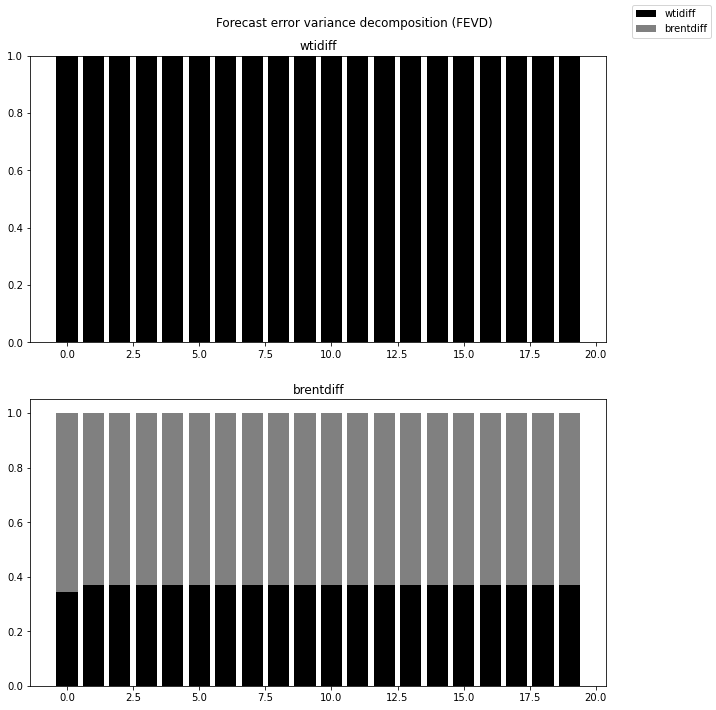

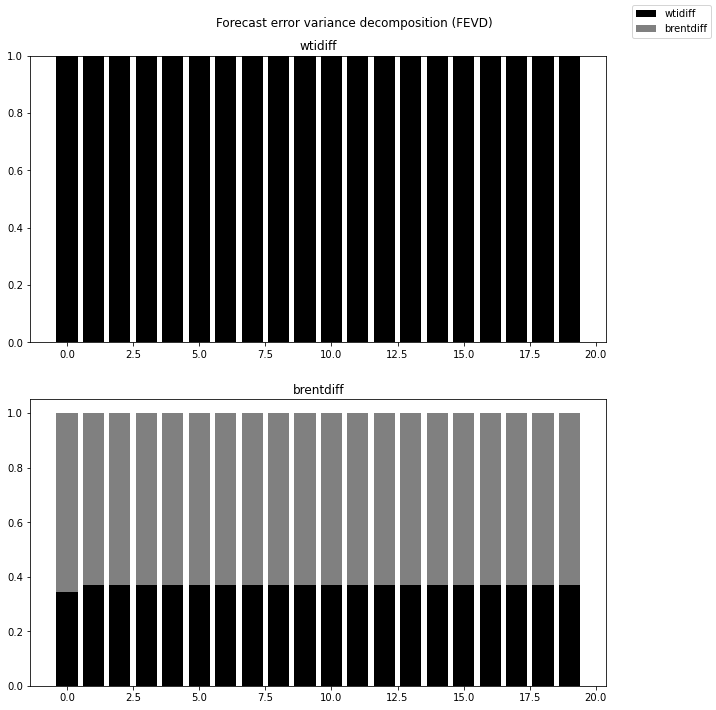

In [21]:
model=smt.VAR(price3)
res=model.fit(maxlags=1)

fevd=res.fevd(20)
fevd.plot()

In [22]:
# we highlight that the WTI series also explain around 40% of 
#the variation for the brent

# Unit Root testing

In [23]:
import pickle
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron

In [24]:
df1= price.iloc[:, :2]
df1

,bp,wp
Date,,
2000-01-01,24.93,25.76
2000-01-02,24.93,25.76
2000-01-03,24.93,25.76
2000-01-04,23.95,25.56
2000-01-05,23.72,24.65
...,...,...
2010-12-27,93.08,90.99
2010-12-28,93.52,91.48
2010-12-29,93.52,91.13


In [25]:
#we obtain the first difference for ADF test
df1['bp_diff'] = df1['bp'].diff(periods=1)
df1['wp_diff'] = df1['wp'].diff(periods=1)
df1

C:\Users\Sandhyana\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bp,wp,bp_diff,wp_diff
Date,,,,
2000-01-01,24.93,25.76,NaN,NaN
2000-01-02,24.93,25.76,0.00,0.00
2000-01-03,24.93,25.76,0.00,0.00
2000-01-04,23.95,25.56,-0.98,-0.20
2000-01-05,23.72,24.65,-0.23,-0.91
...,...,...,...,...
2010-12-27,93.08,90.99,-0.55,0.15
2010-12-28,93.52,91.48,0.44,0.49
2010-12-29,93.52,91.13,0.00,-0.35


In [26]:
df2=df1.dropna()

In [27]:
#ADF test for brent
res=ADF(df2['bp'],lags=2)
res.summary()

Test Statistic,-1.068
P-value,0.728
Lags,2


In [28]:
#ADF test for WTI
res=ADF(df2['wp'],lags=2)
res.summary()

Test Statistic,-1.234
P-value,0.659
Lags,2


In [29]:
#ADF test for brent after first difference 
res=ADF(df2['bp_diff'],lags=2)
res.summary()

Test Statistic,-36.018
P-value,0.000
Lags,2


In [30]:
#ADF test for WTI after first difference
res=ADF(df2['wp_diff'],lags=2)
res.summary()

Test Statistic,-35.525
P-value,0.000
Lags,2


# KPSS tests of the first differences

In [31]:
res=KPSS(df2['bp_diff'],lags=2)
res.summary()

Test Statistic,0.060
P-value,0.816
Lags,2


In [32]:
res=KPSS(df2['wp_diff'],lags=2)
res.summary()

Test Statistic,0.049
P-value,0.880
Lags,2


# Phillips Perron tests for the first differences

In [33]:
res=PhillipsPerron(df2['bp_diff'],lags=2)
res.summary()

Test Statistic,-62.100
P-value,0.000
Lags,2


In [34]:
res=PhillipsPerron(df2['wp_diff'],lags=2)
res.summary()

Test Statistic,-68.075
P-value,0.000
Lags,2


# Cointegration tests

In [35]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from arch.unitroot import DFGLS



In [36]:
df3= price.iloc[:, :2]


In [37]:
# the johansen VAR framework is adopted
# we need to ensure that variables are non stationary

from statsmodels.tsa.vector_ar import vecm
model=vecm.select_order(df3,maxlags=12)
model.summary()

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarn

,AIC,BIC,FPE,HQIC
0,0.1099,0.1194,1.116,0.1133
1,-0.01080,0.004919,0.9893,-0.005228
2,-0.02493,-0.002927,0.9754,-0.01713
3,-0.03452,-0.006229*,0.9661,-0.02449
4,-0.04011,-0.005531,0.9607,-0.02785
5,-0.04555,-0.004683,0.9555,-0.03107
6,-0.05299,-0.005835,0.9484,-0.03628
7,-0.05700*,-0.003558,0.9446*,-0.03806*
8,-0.05601,0.003720,0.9455,-0.03484
9,-0.05556,0.01046,0.9460,-0.03216


In [38]:
vec_rank1=vecm.select_coint_rank(df3,det_order=1,k_ar_diff=1,method='trace',signif=0.01)
vec_rank1.summary()

r_0,r_1,test statistic,critical value
0,2,143.9,23.15
1,2,4.821,6.635


In [39]:
#we obtain the train test statistic with 1% significance level with
#critical values. 

The first row of the table tests the null hypothesis of at most one
cointegrating vector, against the alternative hypothesis that the number of cointegrating equations is strictly larger than the number assumed under the null hypothesis, i.e., larger than one.

In [40]:
#we find that the test statistic of 27.29 exceeds the critical value 
#of 23.15 and hence, the null of at most one cointegrating
#vector is rejected. Moving to the next row, however, the test
#statistic of 2.752 is lower than the critical value of 6.635
#and therefore, the null of at most two cointegrating vectors is
#not rejected at the 1% significance level

Besides the λtrace statistic, we can also employ an alternative statistic, the maximum-eigenvalue statistic (λmax). In contrast to the trace statistic, the maximum-eigenvalue statistic assumes a given number of r cointegrating relations under the null hypothesis and tests this against the alternative that there are r + 1 cointegrating equations

In [41]:
vec_rank2=vecm.select_coint_rank(df3,det_order=1,k_ar_diff=1,method='maxeig',signif=0.01)
vec_rank2.summary()

r_0,r_1,test statistic,critical value
0,1,139.1,21.75
1,2,4.821,6.635


Now that we have determined the lag length, trend specification and the number of cointegrating relationships, we can fit the VECM model.

To do so, we call the function VECM. In the VECM inputs, we first specify both prices as the dependent variables and then select 2 as the number of cointegrating equations (rank) and one again as the maximum lag to be included in the underlying VAR model. 

As in the previous input, we set the deterministic argument to ’co’, meaning that there is a constant inside the cointegrating relationship 



In [42]:
#VECM
model=vecm.VECM(df3,k_ar_diff=1,coint_rank=2,deterministic='co')
res=model.fit()
print(res.summary())

C:\Users\Sandhyana\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Det. terms outside the coint. relation & lagged endog. parameters for equation bp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0347      0.040     -0.862      0.389      -0.114       0.044
L1.bp         -0.1506      0.019     -7.904      0.000      -0.188      -0.113
L1.wp          0.2583      0.017     15.109      0.000       0.225       0.292
Det. terms outside the coint. relation & lagged endog. parameters for equation wp
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1385      0.047      2.929      0.003       0.046       0.231
L1.bp          0.0150      0.022      0.672      0.502      -0.029       0.059
L1.wp         -0.0651      0.020     -3.245      0.001      -0.104      -0.026
                 Loading coefficients (alpha) 